In [45]:
import json
import requests
import pandas
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime

In [46]:
stock =input()
#name ticker
stock

MO


'MO'

In [47]:
url = "https://query1.finance.yahoo.com/v7/finance/quote"

user_agent_headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

headers=user_agent_headers
headers
querystring = querystring = {"symbols":stock}


In [48]:
response = requests.request("GET", url, headers=headers, params=querystring)

In [49]:
stock_json1 = response.json()

In [50]:
#handle errors
if len(stock_json1['quoteResponse']['result']) == 0:
    print("Stock does not exist.")

In [51]:
#stock full name
stock_json1['quoteResponse']['result'][0]['longName']

'Altria Group, Inc.'

In [52]:
url2="https://query1.finance.yahoo.com/v10/finance/quoteSummary/"
query_str = {"symbol": stock, "modules":"financialData"}

response = requests.request("GET",url2, headers=headers,params=query_str)

stock_json2 = response.json()

In [53]:
#current price
stock_json2['quoteSummary']['result'][0]['financialData']['currentPrice']['raw']

43.56

In [54]:
#target mean price
stock_json2['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['raw']

48.7

In [55]:
#cash on hand
stock_json2['quoteSummary']['result'][0]['financialData']['totalCash']['raw']

2567000064

In [56]:
#profit margins
stock_json2['quoteSummary']['result'][0]['financialData']['profitMargins']['raw']

0.08453

In [57]:
#date pulled 
today = datetime.today().strftime('%Y-%m-%d')

In [58]:
#store in JSON 
data = {"Name Ticker" : stock, "Full Name of Stock" : stock_json1['quoteResponse']['result'][0]['longName'],
        "Current Price" : stock_json2['quoteSummary']['result'][0]['financialData']['currentPrice']['raw'],
        "Target Mean Price" : stock_json2['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['raw'],
        "Cash on Hand" : stock_json2['quoteSummary']['result'][0]['financialData']['totalCash']['raw'],
        "Profit Margins" : stock_json2['quoteSummary']['result'][0]['financialData']['profitMargins']['raw'],
        "Date Pulled" : today}

json_form = json.dumps(data)

json_form

'{"Name Ticker": "MO", "Full Name of Stock": "Altria Group, Inc.", "Current Price": 43.56, "Target Mean Price": 48.7, "Cash on Hand": 2567000064, "Profit Margins": 0.08453, "Date Pulled": "2022-10-21"}'

<AxesSubplot:title={'center':'Highest Value of MO Price Over Past 5 Days'}, xlabel='Date'>

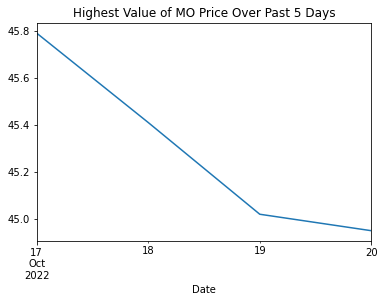

In [62]:
#bonus 
import datetime
import yfinance as yf
from yahoofinancials import YahooFinancials

start_date = (datetime.datetime.now() - datetime.timedelta(days = 5)).date()
end_date = datetime.datetime.now().date()

time_data = yf.download(stock,
                        start = start_date,
                        end = end_date,
                        progress = False
                        )

time_data['High'].plot(title = f'Highest Value of {stock} Price Over Past 5 Days')